<a href="https://colab.research.google.com/github/JSchoonmaker/Research/blob/main/sandy_week_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separation and visual comparison of tweets about Sandy Hook for 12-12-2012 through 12-20-2012

Mounting SIA google drive access

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import re

### Loading twint dataset from SIA Google drive


In [4]:
root_path = 'gdrive/My Drive/SIA_Data_Science/Twitter Scraper Data/sandy_one_year.csv'

In [5]:
df = pd.read_csv(root_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,285535700277919744,285535700277919744,2012-12-30 18:59:50 EST,2012-12-30,18:59:50,-500,820741129,rosieemordi,Rosemary Emordi,NaN,"Looked on a magazine and said ""awe these littl...",en,[],[],[],0,0,0,['sad'],[],https://twitter.com/RosieEmordi/status/2855357...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,285535644325916673,285535644325916673,2012-12-30 18:59:37 EST,2012-12-30,18:59:37,-500,331809661,ellenbarr1,Ellen Barr,NaN,The headlines move on but it's only been a few...,en,[],['http://www.dailymail.co.uk/news/article-2254...,[],0,0,1,['sandyhook'],[],https://twitter.com/EllenBarr1/status/28553564...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,285535639317905408,285535639317905408,2012-12-30 18:59:36 EST,2012-12-30,18:59:36,-500,80220290,dirty_diana29,D!@Π@™,NaN,PTA in Connecticut is collecting snowflakes f...,en,[],['http://instagr.am/p/T4TlZEjjYR/'],[],0,0,0,[],[],https://twitter.com/dirty_diana29/status/28553...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,285535540563030018,285535540563030018,2012-12-30 18:59:12 EST,2012-12-30,18:59:12,-500,43477325,ecobard,Grumpy Old Antifa,NaN,Will climate change ever have its Sandy Hook m...,en,"[{'screen_name': 'conversationedu', 'name': 't...",['http://theconversation.edu.au/will-climate-c...,[],0,0,0,[],[],https://twitter.com/ecobard/status/28553554056...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,285535505096003584,285535505096003584,2012-12-30 18:59:04 EST,2012-12-30,18:59:04,-500,35017099,paulbarer,Norm Feeney,NaN,@kathleenmadigan If the photos of the dead chi...,en,[],[],[],0,0,0,[],[],https://twitter.com/PaulBarer/status/285535505...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


### Initial exploration of dataset

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df.count()

id                 472291
conversation_id    472291
created_at         472291
date               472291
time               472291
timezone           472291
user_id            472291
username           472291
name               472205
place                6389
tweet              472291
language           472291
mentions           472291
urls               472291
photos             472291
replies_count      472291
retweets_count     472291
likes_count        472291
hashtags           472291
cashtags           472291
link               472291
retweet            472291
quote_url              68
video              472291
thumbnail           10688
near                    0
geo                     0
source                  0
user_rt_id              0
user_rt                 0
retweet_id              0
reply_to           472291
retweet_date            0
translate               0
trans_src               0
trans_dest              0
dtype: int64

In [8]:
df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

### Filtering down dataset to needed fields

In [9]:
df1 = df[['id', 
         'created_at', 
         'date', 
         'time', 
         'user_id', 
         'username', 
         'name', 
         'tweet',     
         'likes_count', 
         'hashtags', 
         'retweet']]
df1.head()

,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
0,285535700277919744,2012-12-30 18:59:50 EST,2012-12-30,18:59:50,820741129,rosieemordi,Rosemary Emordi,"Looked on a magazine and said ""awe these littl...",0,['sad'],False
1,285535644325916673,2012-12-30 18:59:37 EST,2012-12-30,18:59:37,331809661,ellenbarr1,Ellen Barr,The headlines move on but it's only been a few...,1,['sandyhook'],False
2,285535639317905408,2012-12-30 18:59:36 EST,2012-12-30,18:59:36,80220290,dirty_diana29,D!@Π@™,PTA in Connecticut is collecting snowflakes f...,0,[],False
3,285535540563030018,2012-12-30 18:59:12 EST,2012-12-30,18:59:12,43477325,ecobard,Grumpy Old Antifa,Will climate change ever have its Sandy Hook m...,0,[],False
4,285535505096003584,2012-12-30 18:59:04 EST,2012-12-30,18:59:04,35017099,paulbarer,Norm Feeney,@kathleenmadigan If the photos of the dead chi...,0,[],False


### Limiting dataset to one day

In [10]:
day_one = df1[(df1.date == '2012-12-12')]
day_one.head()

,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
471832,279078368480215040,2012-12-12 23:20:42 EST,2012-12-12,23:20:42,88301622,justolderjovi,Lauri,@blas69 I knew Shore &amp; Staten Island..(my ...,0,[],False
471833,279076297551011841,2012-12-12 23:12:28 EST,2012-12-12,23:12:28,26539082,___alexandrae,alex bradley,"Sandy Hook, Sea Bright, Asbury Park... Loving ...",0,"['jerseystrong', '121212concert']",False
471834,279075772352847872,2012-12-12 23:10:23 EST,2012-12-12,23:10:23,36214864,radiusalna,tasnim khan,"@DrOz banjovi from your sandy hook, also A ...",0,[],False
471835,279075706917494784,2012-12-12 23:10:08 EST,2012-12-12,23:10:08,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
471836,279074894828949505,2012-12-12 23:06:54 EST,2012-12-12,23:06:54,379849616,cammigail,Cammi :),#ScarStories I have many from my childhood day...,0,['scarstories'],False


In [11]:
day_one.shape

(35, 11)

### Saving day_one dataframe to a csv to test whether it can then be reloaded - or if it will error out. Emma mentioned getting some errors at this step - I was not able to recreate those, perhaps because this is being done in colab?

In [12]:
day_one = day_one.to_csv("day_one_SH.csv", header=True)

In [13]:
day_one_path = '/content/day_one_SH.csv'

In [14]:
day_one_df = pd.read_csv(day_one_path)
day_one_df.head()

,Unnamed: 0,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
0,471832,279078368480215040,2012-12-12 23:20:42 EST,2012-12-12,23:20:42,88301622,justolderjovi,Lauri,@blas69 I knew Shore &amp; Staten Island..(my ...,0,[],False
1,471833,279076297551011841,2012-12-12 23:12:28 EST,2012-12-12,23:12:28,26539082,___alexandrae,alex bradley,"Sandy Hook, Sea Bright, Asbury Park... Loving ...",0,"['jerseystrong', '121212concert']",False
2,471834,279075772352847872,2012-12-12 23:10:23 EST,2012-12-12,23:10:23,36214864,radiusalna,tasnim khan,"@DrOz banjovi from your sandy hook, also A ...",0,[],False
3,471835,279075706917494784,2012-12-12 23:10:08 EST,2012-12-12,23:10:08,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
4,471836,279074894828949505,2012-12-12 23:06:54 EST,2012-12-12,23:06:54,379849616,cammigail,Cammi :),#ScarStories I have many from my childhood day...,0,['scarstories'],False


### Importing libraries to start tokenizing the text from tweets

In [15]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Function to tokenize tweets and create word clouds based on most commonly used words from that day's tweets

### This function is then used on the 2 days prior to the Sandy Hook incident (2012-12-12 - 2012-12-13), the day of the incident (2012-12-14), and the week (2012-12-15 - 2012-12-21) following the incident.

### Of note - these tweets have not been cleaned or filtered except by day. Unrelated tweets, including those about Hurricane Sandy, affect these results as well

In [16]:
def word_cloud_builder(tweets):
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  from PIL import Image
  import matplotlib.pyplot as plt

  tweet_words = []
  for each in tweets:
    tweet_words.append(word_tokenize(each))

  wordfreq = [tweet_words.count(w) for w in tweet_words]

  text = " ".join(tweet_words[1])
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

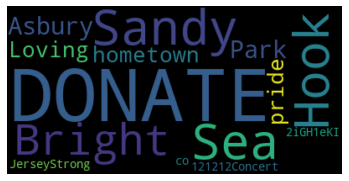

In [17]:
word_cloud_builder(day_one_df.tweet)

In [18]:
day_two = df1[(df1.date == '2012-12-13')]
print(day_two.shape)

(29, 11)


Interesting note - many unrelated tweets that are selling houses or listing real estate use the "sales" hashtag or "real estate" hashtag - so filtering those hashtags out might be a good way of reducing noise in the dataset

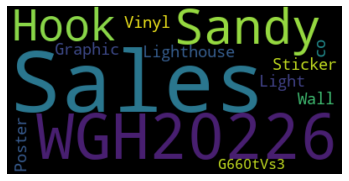

In [19]:
word_cloud_builder(day_two.tweet)

In [20]:
day_three = df1[(df1.date == '2012-12-14')]
print(day_three.shape)

(90094, 11)


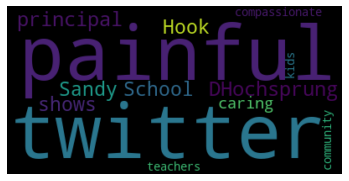

In [21]:
word_cloud_builder(day_three.tweet)

In [22]:
day_four = df1[(df1.date == '2012-12-15')]
print(day_four.shape)

(49249, 11)


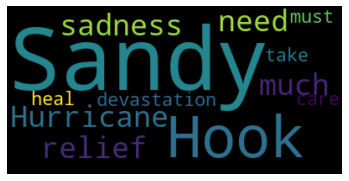

In [23]:
word_cloud_builder(day_four.tweet)

In [24]:
day_five = df1[(df1.date == '2012-12-16')]
print(day_five.shape)

(55516, 11)


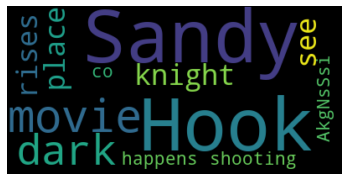

In [25]:
word_cloud_builder(day_five.tweet)

In [26]:
day_six = df1[(df1.date == '2012-12-17')]
print(day_six.shape)

(65816, 11)


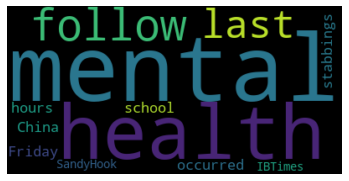

In [27]:
word_cloud_builder(day_six.tweet)

In [28]:
day_seven = df1[(df1.date == '2012-12-18')]
print(day_seven.shape)

(45221, 11)


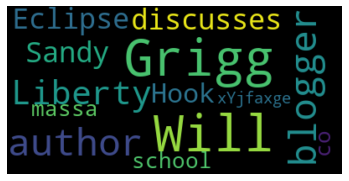

In [29]:
word_cloud_builder(day_seven.tweet)

In [30]:
day_eight = df1[(df1.date == '2012-12-19')]
print(day_eight.shape)

(38334, 11)


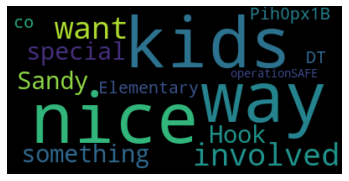

In [31]:
word_cloud_builder(day_eight.tweet)

In [32]:
day_nine = df1[(df1.date == '2012-12-20')]
print(day_nine.shape)

(31667, 11)


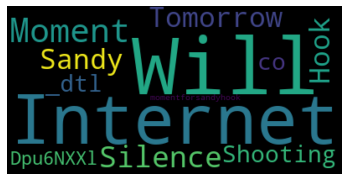

In [33]:
word_cloud_builder(day_nine.tweet)

In [34]:
day_ten = df1[(df1.date == '2012-12-21')]
print(day_ten.shape)

(32693, 11)


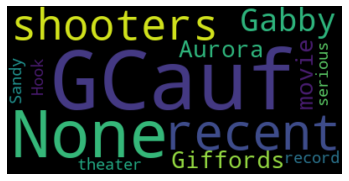

In [35]:
word_cloud_builder(day_ten.tweet)

# Possible next steps - 

1.   Clean and filter tweets, perhaps by hashtag?
2. Modify times to UTC
3. Chg word cloud parameters to do better visual comparisons   
4. Do more robust comparison of word usage - bigrams/trigrams? - when comparing day of incident to days immediately following incident
5. Expand to datasets of tweets surrounding other incidents, including those not as well known

